# **Step 1: Entri Data**

Dataset yang digunakan adalah data hasil crawling dari Twitter, yang setiap datanya berisi text dan class.

In [0]:
# lakukan load dataset terlebih dahulu
import pandas as pd

df_twitter = pd.read_csv("twitter.csv",engine='python')
df_twitter.head()

,name,date,text,class
0,Bram_elbarca10,11/24/2019 16:40,banda aceh itu surganya kopi kopi kopi kopi mi...,1
1,aceh_backpacker,11/24/2019 14:51,rt festival guel dan fiesta panen kopi yang be...,1
2,frikarashi,11/24/2019 14:47,teh dan kopi ga harus sama yang penting sehati...,1
3,KanaRizki13,11/24/2019 14:25,lupa nak bagi kopi aceh semalam ufuffbuduufef,1
4,Aceh_INA,11/24/2019 12:36,cerita dari kebun kopi,1


In [0]:
# coba kita perhatikan berapa banyak data yang kita dapatkan
df_twitter.describe()

,class
count,3275.000000
mean,0.827176
std,0.378153
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [0]:
# coba kita lihat salah satu hasil text
df_twitter["text"][100]

' hari lalu dikasi kopi dari aceh minum pagi pagi sampe sekarang melek naudzubillah'


Salah satu tantangan dalam data kita kali ini adalah banyak bahasa yang tidak lengkap dan tidak baku.

In [0]:
# coba kita lihat berapa banyak jumlah data untuk tiap rate
df_twitter["class"].value_counts()

1    2709
0     566
Name: class, dtype: int64

In [0]:
# coba kita lihat user unik yang ada
df_twitter["name"].value_counts()[:10]

KopI_HitaM_PaiT    231
rizeiz              18
ESBONBONN           15
ngonlain            14
satpam_imut         13
aceh_disbudpar      11
JamuWahyuSejati     11
Nenykriuk           10
Pijat__Kuname        9
selamanyaku          9
Name: name, dtype: int64

In [0]:
# coba kita lihat user unik yang ada
df_twitter["date"].value_counts()[:10]

11/20/2019 15:36    8
11/21/2019 4:47     7
11/16/2019 2:00     7
11/21/2019 4:49     7
11/22/2019 5:12     6
11/21/2019 6:54     6
11/20/2019 12:43    5
11/21/2019 2:59     5
11/20/2019 15:38    5
11/21/2019 4:43     5
Name: date, dtype: int64

In [0]:
#coba kita lihat user dengan nama KopI_HitaM_PaiT, komentar apa yang dia kemukakan
df_twitter[df_twitter["name"] == "KopI_HitaM_PaiT"]

,name,date,text,class
390,KopI_HitaM_PaiT,11/24/2019 9:41,kok datang sih padahal aku belum kopi hitam s...,1
453,KopI_HitaM_PaiT,11/24/2019 0:13,mawar itu emang indah nan elok tp awas ada dur...,1
454,KopI_HitaM_PaiT,11/24/2019 0:13,rt uuu uuu uuuuu uu secangkir kopi hitam penuh...,1
455,KopI_HitaM_PaiT,11/24/2019 0:12,rt morning syg masih ada slot buat jdwal inclu...,1
458,KopI_HitaM_PaiT,11/23/2019 23:38,masih dengan rutinitas minggu pagi nikmati yan...,1
...,...,...,...,...
1213,KopI_HitaM_PaiT,11/20/2019 15:12,di pingit akhir nyaufufufuf,1
1215,KopI_HitaM_PaiT,11/20/2019 15:12,rt pria penikmat kopi hitam itu mudah mengalah...,1
1216,KopI_HitaM_PaiT,11/20/2019 15:12,semedi dia cir,1
1237,KopI_HitaM_PaiT,11/20/2019 14:20,rt pria penikmat kopi hitam itu mudah mengalah...,1


# Step 2: Preprocessing

Pada tahap ini tujuannya adalah mengubah dataset supaya dapat diolah pada algoritma Machine Learning.

#Labeling Class

Pertama, kita akan mengubah menjadi 2 sentiment, yaitu 'positif' dan 'negatif'.

*   Untuk sentiment positif, adalah data dengan label 1
*   Untuk sentiment negatif, adalah data dengan 0

In [0]:
df_twitter = pd.read_csv("twitter.csv",engine='python')
df_twitter.head()

,name,date,text,class
0,Bram_elbarca10,11/24/2019 16:40,banda aceh itu surganya kopi kopi kopi kopi mi...,1
1,aceh_backpacker,11/24/2019 14:51,rt festival guel dan fiesta panen kopi yang be...,1
2,frikarashi,11/24/2019 14:47,teh dan kopi ga harus sama yang penting sehati...,1
3,KanaRizki13,11/24/2019 14:25,lupa nak bagi kopi aceh semalam ufuffbuduufef,1
4,Aceh_INA,11/24/2019 12:36,cerita dari kebun kopi,1


In [0]:
# cek lagi data
df_twitter['class'].value_counts()

1    2709
0     566
Name: class, dtype: int64

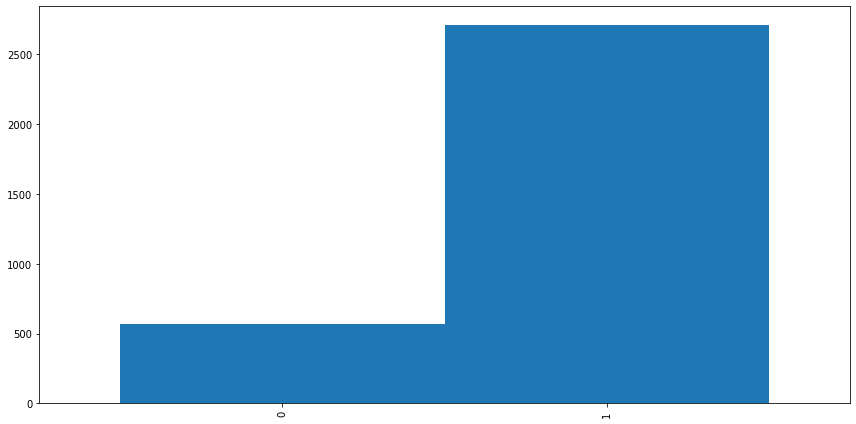

In [0]:
# kita lihat lagi distribusi label
import matplotlib.pyplot as plt

_, ax1 = plt.subplots(figsize=(12,6))

stars_histogram = df_twitter["class"].value_counts().sort_index()

stars_histogram.plot(kind="bar", width=1.0)
plt.tight_layout()
plt.show()

# **Drop Unused Column in Dataframe**

In [0]:
df_preprocessed = df_review.copy()
df_preprocessed = df_preprocessed.drop(columns=['date', 'name'])
df_preprocessed.head()

,text,class
0,banda aceh itu surganya kopi kopi kopi kopi mi...,1
1,rt festival guel dan fiesta panen kopi yang be...,1
2,teh dan kopi ga harus sama yang penting sehati...,1
3,lupa nak bagi kopi aceh semalam ufuffbuduufef,1
4,cerita dari kebun kopi,1


#**Balancing Dataset**

In [0]:
# bootstrap
s_1 = df_preprocessed[df_preprocessed['class']==0].sample(25000,replace=True)
s_2 = df_preprocessed[df_preprocessed['class']==1].sample(25000,replace=True)
df_preprocessed = pd.concat([s_1, s_2])

print(df_preprocessed.shape)
print(df_preprocessed['class'].value_counts(normalize=True))

(50000, 2)
1    0.5
0    0.5
Name: class, dtype: float64


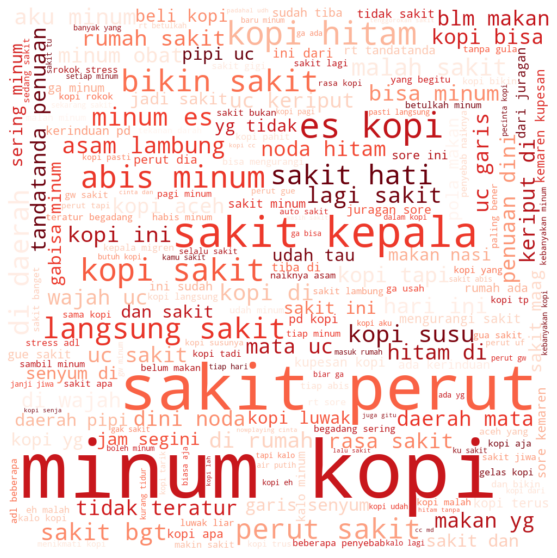

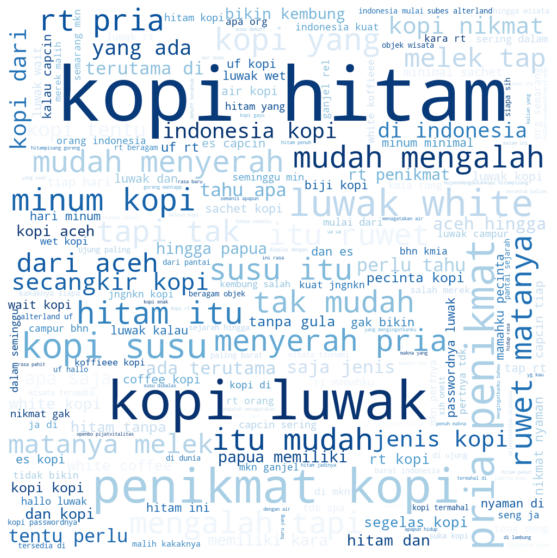

In [0]:
# wordcloud
from wordcloud import WordCloud

# Polarity == 0 negative
train_s0 = df_preprocessed[df_preprocessed["class"] == 0]
all_text_s0 = ' '.join(word for word in train_s0["text"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

# Polarity == 1 positive
train_s1 = df_preprocessed[df_preprocessed["class"] == 1]
all_text_s1 = ' '.join(word for word in train_s1["text"])
wordcloud = WordCloud(width=1000, height=1000, colormap='Blues', background_color='white', mode='RGBA').generate(all_text_s1)
plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

#**Cleaning Data**

Hapus tanda baca, lower text, dll.


In [0]:
import string, re

def cleansing(data):
    # lower text
    data = data.lower()
    
    # hapus punctuation
    remove = string.punctuation
    translator = str.maketrans(remove, ' '*len(remove))
    data = data.translate(translator)
    
    # remove ASCII dan unicode
    data = data.encode('ascii', 'ignore').decode('utf-8')
    data = re.sub(r'[^\x00-\x7f]',r'', data)
    
    # remove newline
    data = data.replace('\n', ' ')
    
    return data

In [0]:
# jalankan cleansing data
twitter = []
for index, row in df_preprocessed.iterrows():
    twitter.append(cleansing(row["text"]))
    
df_preprocessed["text"] = twitter
df_preprocessed.head()

,text,class
2804,udh gitu aing ke coffeshope gapernah beli kopi...,0
2994,inget banget ini blm tidur seharian blm makan ...,0
3036,jam tidur gak usah ditanya rekor gue dalam sem...,0
3103,perut w sakit banget sii gilaa grgr kemarin mi...,0
2709,buat yg blg thread ice cream sy bikin batuk sa...,0


#**Melakukan Stemming**

In [0]:
# install kamus stemming sastrawi terlebih dahulu jika belum terinstall, dengan pip install Sastrawi

In [0]:
pip install Sastrawi

     |████████████████████████████████| 215kB 2.8MB/s 


In [0]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# contoh
kalimat = 'Valentino Rossi tampak sangat menyesal setelah terjatuh pada lap terakhir MotoGP Prancis 2017'
katadasar = stemmer.stem(kalimat)
 
print(katadasar)

valentino rossi tampak sangat sesal telah jatuh pada lap akhir motogp prancis 2017


In [0]:
# implementasi pada data kita
twitter = []
for index, row in df_twitter.iterrows():
    twitter.append(stemmer.stem(row["text"]))
    
df_twitter["text"] = twitter
df_twitter.head()

,name,date,text,class
0,Bram_elbarca10,11/24/2019 16:40,banda aceh itu surga kopi kopi kopi kopi mie s...,1
1,aceh_backpacker,11/24/2019 14:51,rt festival guel dan fiesta panen kopi yang la...,1
2,frikarashi,11/24/2019 14:47,teh dan kopi ga harus sama yang penting sehat ...,1
3,KanaRizki13,11/24/2019 14:25,lupa nak bagi kopi aceh malam ufuffbuduufef,1
4,Aceh_INA,11/24/2019 12:36,cerita dari kebun kopi,1


In [0]:
# sekarang coba kita cek frekuensi kemunculan untuk tiap kata

#**Drop Column Dataframe Tidak dipakai**

In [0]:
df_preprocessed = df_twitter.copy()
df_preprocessed = df_preprocessed.drop(columns=['date', 'name'])
df_preprocessed.head()

,text,class
0,banda aceh itu surga kopi kopi kopi kopi mie s...,1
1,rt festival guel dan fiesta panen kopi yang la...,1
2,teh dan kopi ga harus sama yang penting sehat ...,1
3,lupa nak bagi kopi aceh malam ufuffbuduufef,1
4,cerita dari kebun kopi,1


#**Pembagian data menjadi data train dan data tes**

In [0]:
# install sklearn terlebih dahulu jika belum terinstall, dengan pip install sklearn

In [0]:
!pip install sklearn

In [0]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_preprocessed, test_size=0.3, random_state=1)

In [0]:
# lihatlah perbandingannya untuk data train pada sentiment positive dan negative
print(train['class'].value_counts(normalize=True))

1    0.82199
0    0.17801
Name: class, dtype: float64


Karena jumlah class sentiment positive dan negative tidak seimbang pada data training, kita akan buat dataset menjadi seimbang dengan bootstraping.

In [0]:
# bootstrap
t_1 = train[train['class']==0].sample(2000,replace=True)
t_2 = train[train['class']==1].sample(2000,replace=True)
training_bs = pd.concat([t_1, t_2])

print(train.shape)
print(training_bs.shape)
print(test.shape)

# sanity check 
df_twitter.shape[0] == (train.shape[0] + test.shape[0])

(2292, 2)
(4000, 2)
(983, 2)


True

In [0]:
print(training_bs['class'].value_counts(normalize=True))

1    0.5
0    0.5
Name: class, dtype: float64


In [0]:
training_bs.head()

,text,class
2880,tandatanda tua dini noda hitam di wajah uc ker...,0
2995,pagipagi dah makan geprek sama es kopi ntar sa...,0
2807,pintar oja malam ini minum kopi tapi blm makan...,0
3071,wkwkw kopi apa sakit jiwaa brand mana itu,0
3204,kaya aku udah ga cocok jadi nikmat kopi jadi g...,0


In [0]:
# install terlebih dahulu dengan pip install wordcloud

In [0]:
!pip install wordcloud

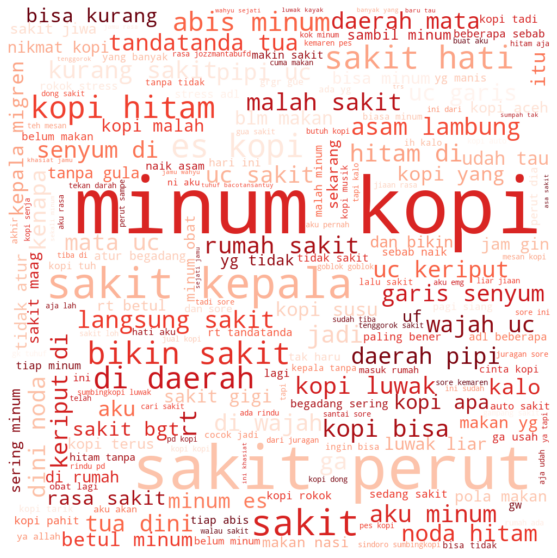

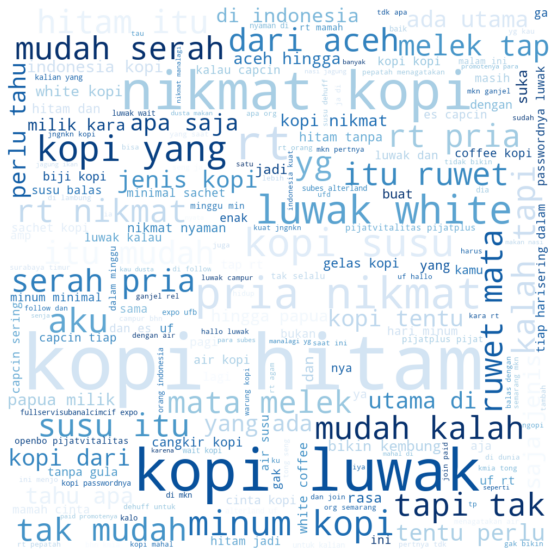

In [0]:
# wordcloud
from wordcloud import WordCloud

# Polarity == 0 negative
train_s0 = training_bs[training_bs["class"] == 0]
all_text_s0 = ' '.join(word for word in train_s0["text"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

# Polarity == 1 positive
train_s1 = training_bs[training_bs["class"] == 1]
all_text_s1 = ' '.join(word for word in train_s1["text"])
wordcloud = WordCloud(width=1000, height=1000, colormap='Blues', background_color='white', mode='RGBA').generate(all_text_s1)
plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [0]:
# kita juga bisa cek top 20 kata untuk masing-masing sentiment
from collections import Counter

counter_s0 = Counter(all_text_s0.split()).most_common(50)
counter_s1 = Counter(all_text_s1.split()).most_common(50)
print(counter_s0)
print()
print(counter_s1)

[('kopi', 1767), ('sakit', 1742), ('minum', 1034), ('perut', 615), ('aku', 393), ('di', 304), ('dan', 258), ('ga', 258), ('makan', 257), ('yg', 232), ('ini', 217), ('kepala', 199), ('ya', 192), ('gue', 187), ('rt', 181), ('aja', 172), ('tapi', 164), ('bisa', 163), ('kalo', 161), ('jadi', 156), ('hitam', 152), ('lagi', 143), ('sore', 141), ('rasa', 138), ('apa', 131), ('hari', 131), ('hati', 127), ('bikin', 127), ('yang', 124), ('tak', 124), ('uc', 120), ('banyak', 117), ('jam', 113), ('ada', 113), ('lambung', 101), ('obat', 100), ('es', 99), ('uf', 99), ('buat', 97), ('bgt', 94), ('tidak', 92), ('malah', 92), ('udah', 91), ('abis', 90), ('tidur', 90), ('tau', 88), ('belum', 88), ('sama', 87), ('gak', 85), ('tiap', 84)]

[('kopi', 2018), ('hitam', 779), ('rt', 671), ('luwak', 526), ('nikmat', 383), ('di', 374), ('yang', 348), ('dan', 267), ('itu', 257), ('dari', 212), ('susu', 198), ('aceh', 196), ('minum', 189), ('uf', 187), ('ada', 184), ('ini', 177), ('pria', 163), ('tak', 161), ('ap

#**Feature Extraction** 

Feature extraction merupakan sebuah step untuk mentransformasi teks kedalam angka atau yang bisa disebut feature representation. Terdapat beragam teknik untuk merubah teks kedalam array, tapi pada dasarnya kata kata unik dalam corpus itu yang menjadi featurenya. Feature extraction yang umum digunakan dalam sklearn adalah Count Vectorizer dan TF-IDF.

Count Vectorizer ini mudahnya menghitung semua kejadian kata dalam satu dokumen sedangkan tf-idf memberikan bobot masing masing kata.

In [0]:
# install terlebih dahulu sklearn dengan pip install sklearn

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'Pusing satu kali',
    'Pusing dua kali',
    'Pusing tiga kali',
    'Pusing lagi']

vectorizer = CountVectorizer()

# contoh
X = vectorizer.fit_transform(corpus)
X.toarray()

array([[0, 1, 0, 1, 1, 0],
       [1, 1, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 1],
       [0, 0, 1, 1, 0, 0]])

In [0]:
# implementasi pada dokumen kita
X_train = vectorizer.fit_transform(training_bs["text"])
X_test = vectorizer.transform(test["text"])

print(X_train.shape)
print(X_test.shape)

(4000, 3777)
(983, 3777)


#**Wrapping All Preprocessing**

In [0]:
def preprocess_data(data):
    # cleansing data
    data = cleansing(data)
    
    # hapus stopwords
    factory = StopWordRemoverFactory()
    stopword = factory.create_stop_word_remover()
    data = stopword.remove(data)
    
    # stemming
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    data = stemmer.stem(data)
    
    # count vectorizer
    data = vectorizer.transform([data])
    
    return data

#**Tranning**

Pada algoritma Machine Learning yang digunakan adalah Naive Bayes Multinomial Classifier.

Multinomial Naive Bayes digunakan untuk data kategorikal, ini juga merupakan algoritma yang paling umum digunakan Naive Bayes karena kesederhanaannya. Algoritma ini adalah pengembangan dari algoritma naive bayes classifier. 


In [0]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, training_bs['class'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
y_mnb = mnb.predict(X_train)

In [0]:
print(confusion_matrix(training_bs['class'],y_mnb))
tn, fp, fn, tp = confusion_matrix(training_bs['class'], y_mnb).ravel()
print ("TP : {} \nTN : {} \nFP : {}\nFN : {}".format(tp, tn, fp, fn))

[[1985   15]
 [ 110 1890]]
TP : 1890 
TN : 1985 
FP : 15
FN : 110


In [0]:
# lakukan prediksi pada data test
predict = mnb.predict(X_test)

In [0]:
# import library evaluation
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, accuracy_score

In [0]:
#accuracy
accuracy_score(test['class'],predict)

0.8972533062054934

In [9]:
# f1_score
f1_score(test['class'], predict)

NameError: ignored

In [0]:
# precision score
precision_score(test['class'], predict)

0.9905149051490515

In [0]:
# recall score
recall_score(test['class'], predict)

0.8860606060606061